# DIP A-2 2019040

## Q3 Histogram Equalization

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def norm_hist(in_img):
    
    m,n = in_img.shape
    
    return np.bincount(in_img.flatten())/(m*n)

def get_cdf(norm_hist):
    
    return np.array([sum(norm_hist[:i+1]) for i in range(len(norm_hist))])

def hist_eq(in_img):
    
    in_h = norm_hist(in_img)
    print(in_h)
    in_H = get_cdf(in_h)
    
    out_img = np.array(in_img, copy=True)
    
    s = np.array(255*in_H, dtype=int)
    
    L = len(in_H)
    
    for i in range(L):
        out_img[in_img==i]=s[i]
        
    out_h = norm_hist(out_img)
    out_H = get_cdf(out_h)
    
    return in_img, in_h, in_H, out_img, out_h, out_H

def plot_hist(hist, title):
    
    plt.title(title)
    plt.plot(hist, color='r')
    plt.bar(np.arange(len(hist)), hist, color='r')
    plt.xlabel("Pixel values (0-255)")
    plt.ylabel("Fraction of Pixels")
    plt.show()
    
def plot_cdf(cdf, title):
    
    plt.title(title)
    plt.plot(cdf, color='b')
    plt.xlabel("Pixel values (0-255)")
    plt.ylabel("Fraction of Pixels")
    plt.show()
    

In [2]:
path = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-2/"
name="x5.bmp"
img = cv2.imread(path+name,0)

in_img, in_h, in_H, out_img, out_h, out_H = hist_eq(img)

[2.45666504e-03 9.61303711e-04 1.00708008e-03 1.32751465e-03
 1.63269043e-03 2.36511230e-03 3.12805176e-03 4.82177734e-03
 7.52258301e-03 1.07879639e-02 1.31835938e-02 1.52587891e-02
 1.98974609e-02 2.10876465e-02 2.32391357e-02 2.07977295e-02
 1.39160156e-02 8.04138184e-03 5.31005859e-03 3.90625000e-03
 3.40270996e-03 3.00598145e-03 2.44140625e-03 2.34985352e-03
 1.95312500e-03 1.89208984e-03 1.69372559e-03 1.87683105e-03
 1.60217285e-03 1.66320801e-03 1.32751465e-03 1.52587891e-03
 1.52587891e-03 1.77001953e-03 1.35803223e-03 1.38854980e-03
 1.40380859e-03 1.20544434e-03 1.49536133e-03 1.48010254e-03
 1.40380859e-03 1.44958496e-03 1.41906738e-03 1.05285645e-03
 1.12915039e-03 1.05285645e-03 1.34277344e-03 1.29699707e-03
 1.19018555e-03 8.69750977e-04 9.00268555e-04 8.23974609e-04
 1.08337402e-03 1.03759766e-03 9.30786133e-04 1.12915039e-03
 1.43432617e-03 1.14440918e-03 1.15966797e-03 1.15966797e-03
 1.05285645e-03 1.03759766e-03 1.00708008e-03 1.32751465e-03
 1.00708008e-03 9.460449

In [3]:
in_h.shape

(256,)

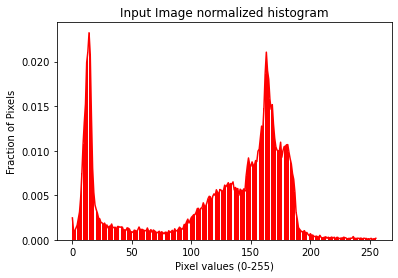

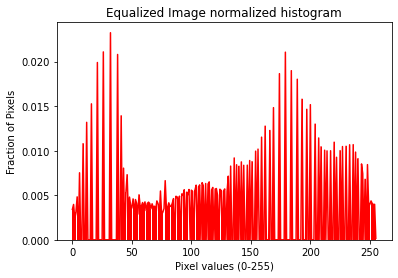

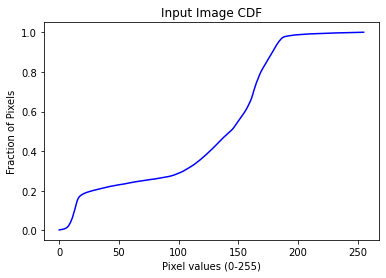

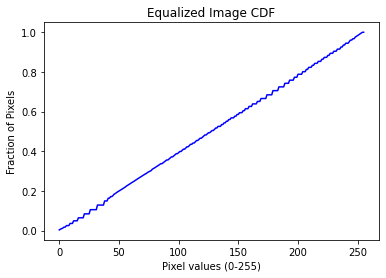

In [3]:
## plotting
plot_hist(in_h,"Input Image normalized histogram")
plot_hist(out_h,"Equalized Image normalized histogram")
plot_cdf(in_H,"Input Image CDF")
plot_cdf(out_H,"Equalized Image CDF")

In [4]:
## display images

cv2.imwrite("in_eq.bmp",in_img)
cv2.imwrite("out_eq.bmp",out_img)

i=cv2.imread(path+"in_eq.bmp",0)
e=cv2.imread(path+"out_eq.bmp",0)

cv2.imshow("Input",i)
cv2.imshow("Equalized",e)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q4 Histogram Matching

In [5]:
def hist_matching(I, gamma):
    
    M = np.array(I,copy=True)
    
    T = np.array(255*np.power(I/255,gamma),dtype=int)
    
    h = norm_hist(I)
    g = norm_hist(T)
    H = get_cdf(h)
    G = get_cdf(g)
    
    L = len(H)
    
    for i in range(L):
        
        if H[i]==0:
            continue
            
        argmin=None
        mindiff=None
        
        for j in range(len(G)):
            
            if G[j]==0:
                continue
                
            if mindiff is None or abs(H[i]-G[j]) < mindiff:
                argmin=j
                mindiff=abs(H[i]-G[j])
        
        
        M[I==i]=argmin
        
    m = norm_hist(M)
    
    return I, h, T, g, M, m
                
        

In [6]:
path = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-2/"
name="x5.bmp"
img = cv2.imread(path+name,0)
I,h,T,g,M,m = hist_matching(img,0.5)

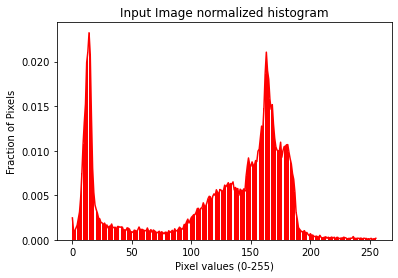

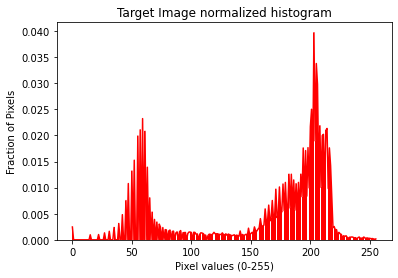

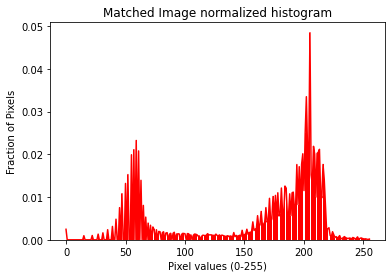

In [7]:
## plotting

plot_hist(h,"Input Image normalized histogram")
plot_hist(g,"Target Image normalized histogram")
plot_hist(m,"Matched Image normalized histogram")
# plot_cdf(in_H,"Input Image CDF")
# plot_cdf(out_H,"Equalized Image CDF")

In [8]:
## display images

cv2.imwrite("I.bmp",I)
cv2.imwrite("T.bmp",T)
cv2.imwrite("M.bmp",M)

i=cv2.imread(path+"I.bmp",0)
t=cv2.imread(path+"T.bmp",0)
m=cv2.imread(path+"M.bmp",0)

cv2.imshow("Input",i)
cv2.imshow("Target",t)
cv2.imshow("Matched",m)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q5 Convolution

In [9]:
##### generate two random 3x3 matrices

def rotate_filter(f):
    
    return np.flip(np.flip(f,axis=0),axis=1)
      
def conv(I,f):
    
    n=I.shape[0]
    m=f.shape[0]
    size=n+m-1
    
    O = np.zeros((size,size))
    
    I_pad = np.pad(I,(m-1,m-1),constant_values=0)
    
    f_rot = rotate_filter(f)
    
    for i in range(m//2,size+m//2):
        for j in range(m//2,size+m//2):
            
            O[i-(m//2),j-(m//2)]= np.sum(I_pad[i-(m//2):i+(m//2+1),j-(m//2):j+(m//2+1)]*f_rot)
    
    print("Input:\n",I,"\n")
    print("Filter:\n",f,"\n")
    print("Rotated Filter:\n",f_rot,"\n")
    print("Output:\n",O,"\n")
    
    return O

n=3
m=3
## generate 3x3 random matrices of type int with range 0-255
I = np.random.randint(low=0,high=256,size=(n,n))
f = np.random.randint(low=0,high=256,size=(m,m))
O=conv(I,f)


Input:
 [[ 96  78  15]
 [ 21  63  21]
 [162  43 107]] 

Filter:
 [[ 12  55 242]
 [111  29  94]
 [  1 176 240]] 

Rotated Filter:
 [[240 176   1]
 [ 94  29 111]
 [242  55  12]] 

Output:
 [[ 1152.  6216. 27702. 19701.  3630.]
 [10908. 13353. 21750. 24168.  6492.]
 [ 4371. 34002. 85768. 44182. 31468.]
 [18003. 13230. 44501. 25961. 15098.]
 [  162. 28555. 46555. 29152. 25680.]] 

